About the dataset
This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go).

The data as described by Myles O'Neill is:

'#': ID for each pokemon

Name: Name of each pokemon

Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

Type 2: Some pokemon are dual type and have 2

Total: sum of all stats that come after this, a general guide to how strong a pokemon is

HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

Attack: the base modifier for normal attacks (eg. Scratch, Punch)

Defense: the base damage resistance against normal attacks

SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

SP Def: the base damage resistance against special attacks

Speed: determines which pokemon attacks first each round

# Imports

In [385]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')

from ast import literal_eval

In [386]:
%matplotlib inline
sns.set_style("darkgrid")

# Descriptive statistics

In [387]:
pokemon_df = pd.read_csv("../data/raw/pokemon.csv")
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [388]:
print(f"Unique primary types: {pokemon_df['type1'].nunique()}")
print(f"Unique secondary types: {pokemon_df['type2'].nunique()}")

Unique primary types: 18
Unique secondary types: 18


In [389]:
pokemon.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


In [390]:
pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


# Data processing

In [391]:
pokemon_df.drop(['japanese_name', 'pokedex_number'], axis=1, inplace=True)

In [392]:
pokemon_df["abilities"] = pokemon_df.apply(lambda x: literal_eval(x["abilities"]), axis=1)

# Data Visualization

**How many new Pokémons are there per generation?**

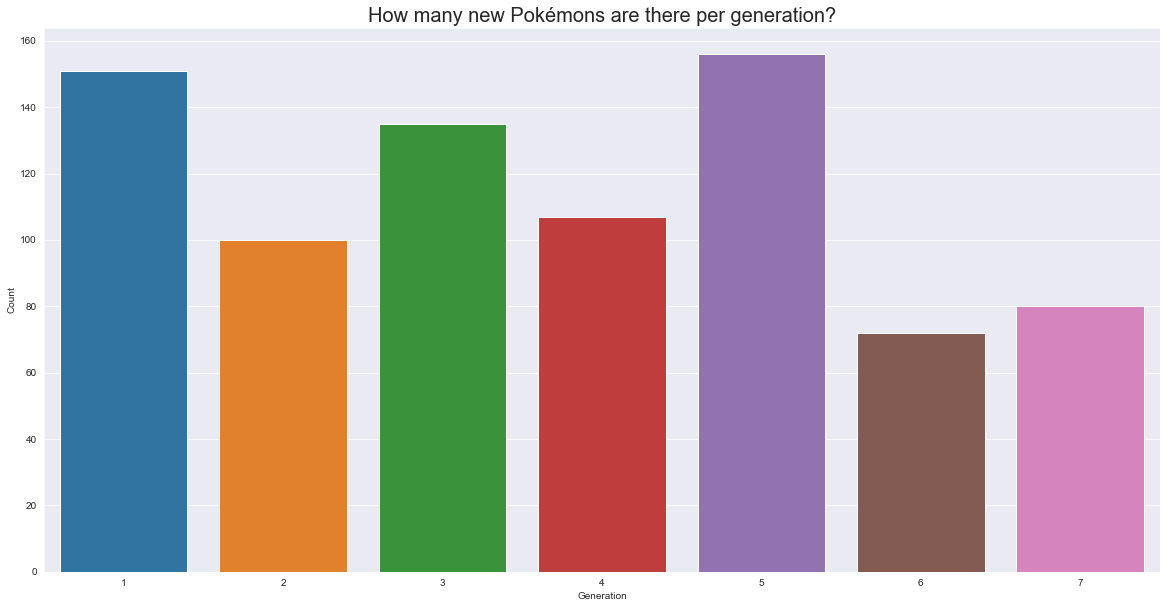

In [393]:
plt.figure(figsize=(20,10))
ax = sns.countplot(pokemon_df.generation)
ax.set_title("How many new Pokémons are there per generation?", size=20)
ax.set(xlabel="Generation", ylabel="Count");

Odd generations have more new Pokémons as compared to the even ones.

**What are the most prevalent primary types?**

Let's use a treemap to visualize this. A treemap displays each element of a dataset as a rectangle. It allows to see what proportion each element has compared to the whole.

In [394]:
type1_value_counts = pokemon_df["type1"].value_counts()

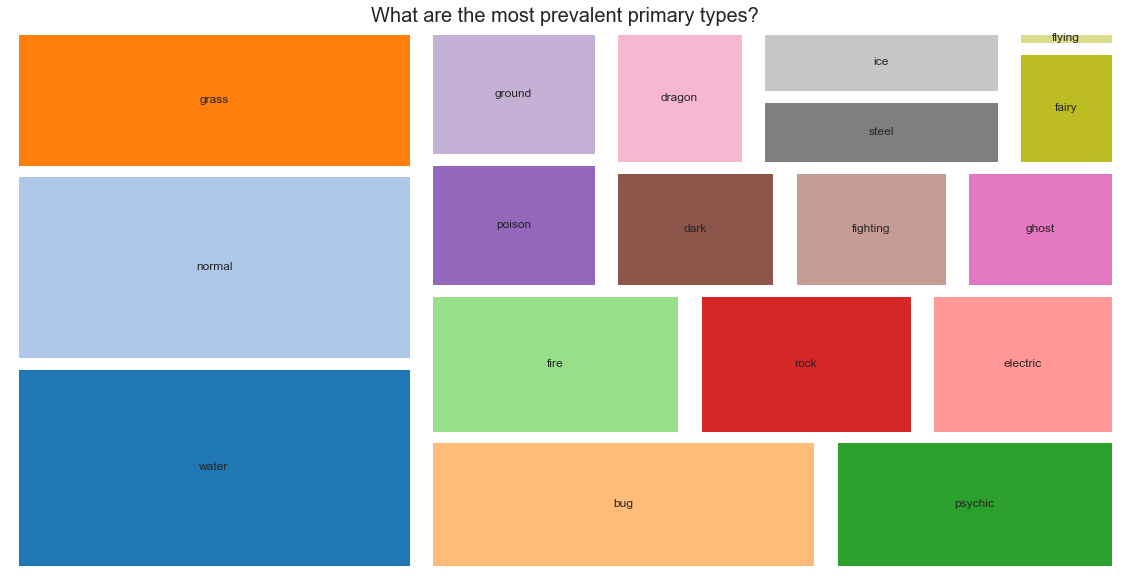

In [395]:
plt.figure(figsize=(20,10))
ax = squarify.plot(type1_value_counts, 
              label=type1_value_counts.index,
              color=sns.color_palette("tab20", len(type1_value_counts)),
              pad=1,
              text_kwargs={'fontsize': 12})
ax.set_title("What are the most prevalent primary types?", size=20)
plt.axis('off');

Water type Pokémon are the most common, followed by Normal and Grass.

**What about secondary types?**

For this we are using a bar chart.

In [396]:
print(f"To note that a very large number of Pokémon do not have a secondary type: {pokemon_df['type2'].isnull().sum()}")

To note that a very large number of Pokémon do not have a secondary type: 384


In [397]:
type2_value_counts = pokemon_df["type2"].value_counts()
types_df = pd.concat([type1_value_counts, type2_value_counts], axis=1)

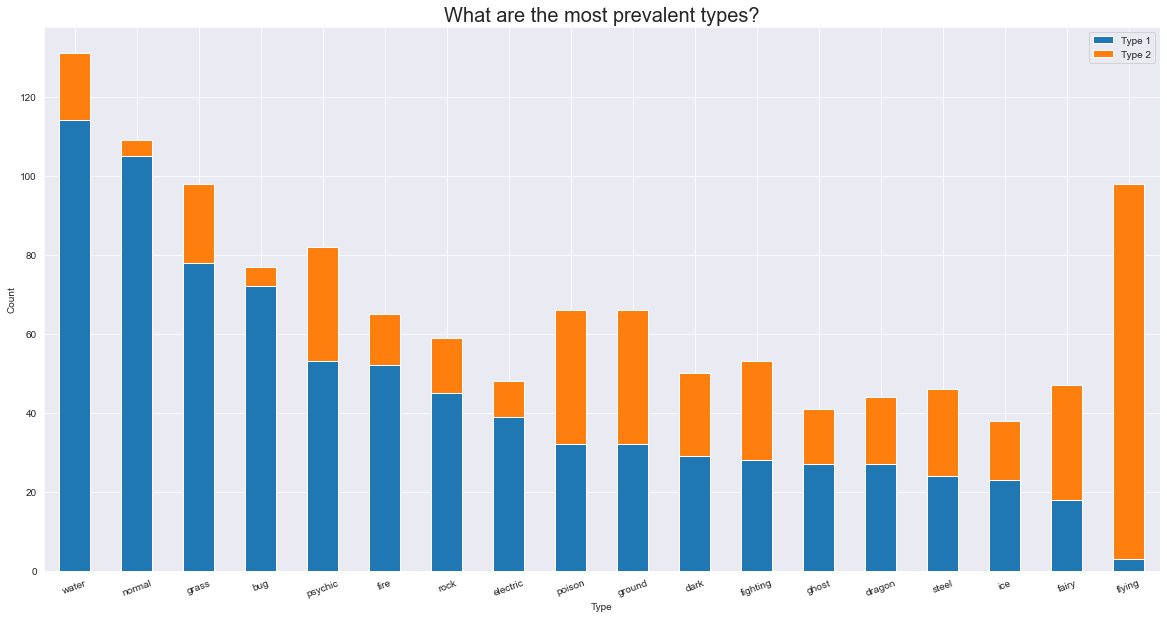

In [398]:
ax = types_df.plot(kind="bar", stacked=True, figsize=(20,10))
ax.set_title("What are the most prevalent types?", size=20)
ax.set(xlabel="Type", ylabel="Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, size=10);
ax.legend(["Type 1", "Type 2"]);

Flying type Pokémon are the most common type 2, followed by Poison, Ground and Fairy types.

**What are the most common type combinations?**

In [399]:
pokemon_df["type"] = pokemon_df.apply(
    lambda x: x["type1"] if pd.isnull(x["type2"]) else f"{x['type1']}_{x['type2']}", 
    axis=1)

pokemon_df["has_second_type"] = pokemon_df.apply(
    lambda x: False if pd.isnull(x["type2"]) else True, 
    axis=1)

top15_type_value_counts = pokemon_df[pokemon_df["has_second_type"]]["type"].value_counts()[:15]

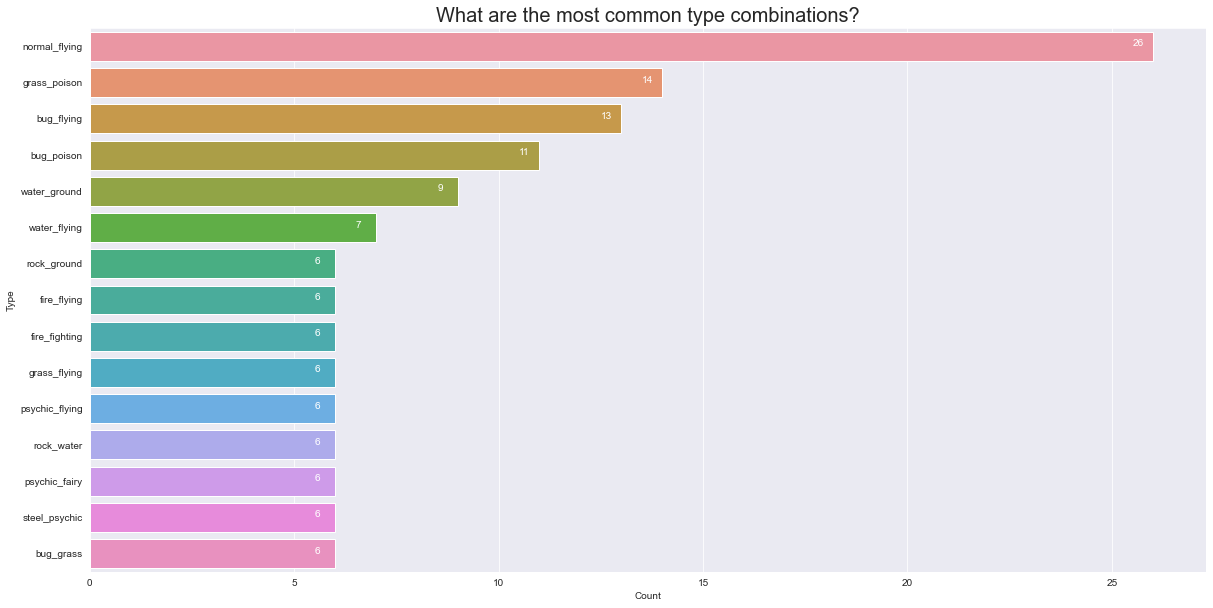

In [400]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=top15_type_value_counts.index, x=top15_type_value_counts.values, orient='h')
ax.set_title("What are the most common type combinations?", size=20)
ax.set(ylabel="Type", xlabel="Count");

# Annotate value labels to each type
for index, value in enumerate(top15_type_value_counts): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-0.5, index), color='white') 

**What are the most common types of legendary Pokémons?**

In [401]:
legendary_pokemon = pokemon_df[pokemon_df['is_legendary'] == True]
legendary_pokemon_types_top5 = legendary_pokemon["type"].value_counts()[:5]

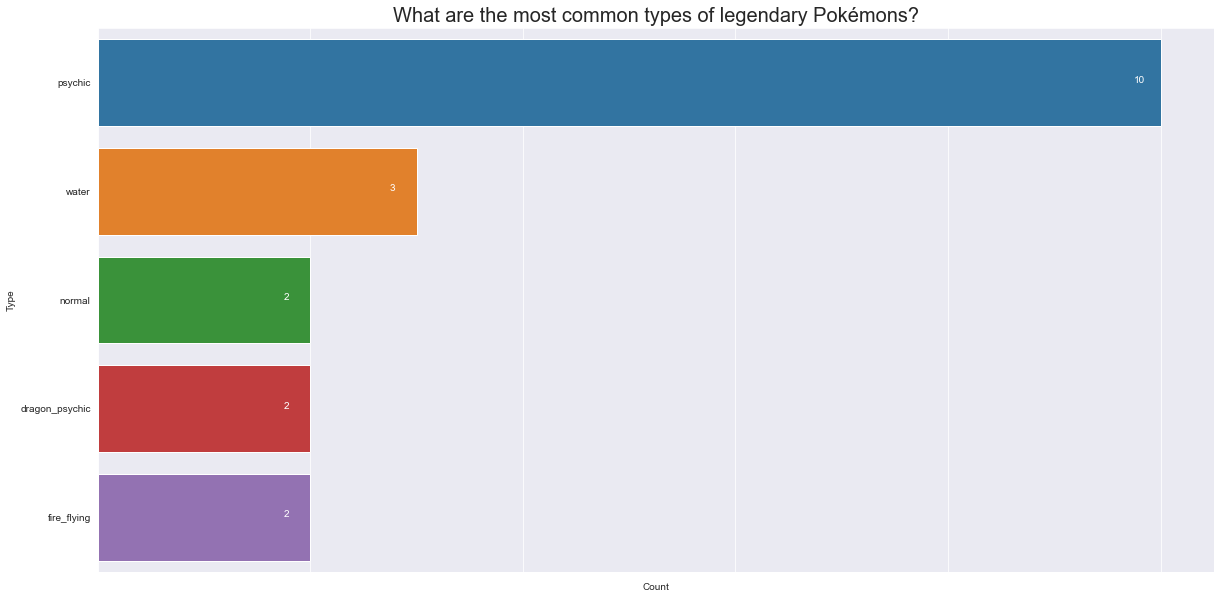

In [402]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=legendary_pokemon_types_top5.index, x=legendary_pokemon_types_top5.values, orient='h')
ax.set_title("What are the most common types of legendary Pokémons?", size=20)
ax.set(xlabel="Count", ylabel="Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, size=10);

# Annotate value labels to each type
for index, value in enumerate(legendary_pokemon_types_top5): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value-0.25, index), color='white') 

Psychic is the most common type of legendary Pokémons, followed by water.


**How do types vary across generations?**

<AxesSubplot:>

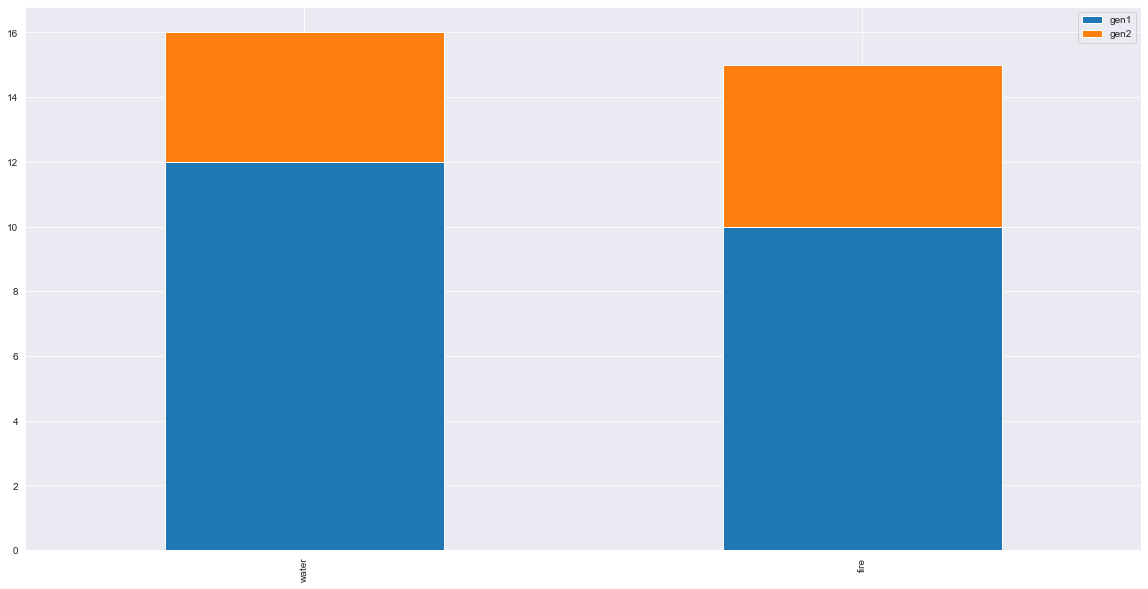

In [455]:
type1_generation_df = pokemon_df.groupby(['generation', 'type1'])['name'].count().to_frame().reset_index()

type1_generation_df[type1_generation_df["type1"]=="bug"]["name"]

d = pd.DataFrame({"gen1": [12,10], "gen2": [4,5]}, index= ["water", "fire"])
d.plot(kind="bar", stacked=True, figsize=(20,10))

**How many abilities do Pokémon usually have?**

In [403]:
pokemon_df["n_abilities"] = pokemon_df.apply(lambda x: len(x["abilities"]), axis=1)

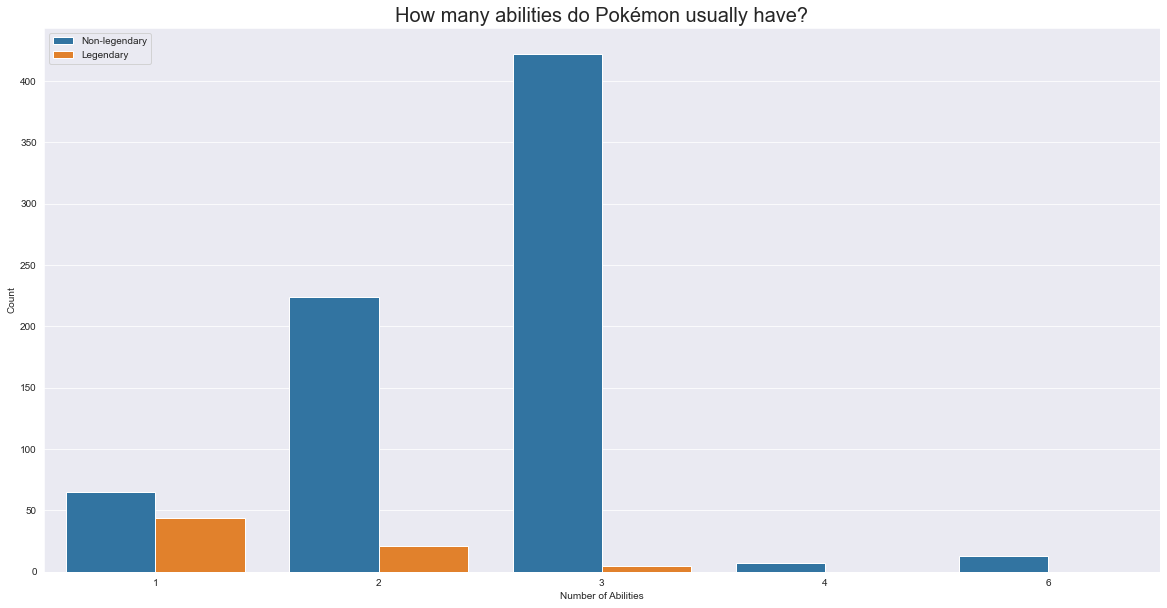

In [404]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data=pokemon_df, x="n_abilities", hue="is_legendary")
ax.set_title("How many abilities do Pokémon usually have?", size=20)
ax.set(xlabel="Number of Abilities", ylabel="Count");
ax.legend(["Non-legendary", "Legendary"]);

3 is the most common number of abilities for non-legendary Pokémon, while most legendary Pokémons only have 1 ability.

# References

1. [Pokemon Data Visualization](https://www.kaggle.com/shreekant009/pokemon-data-visualization/notebook)

# Capture Rate

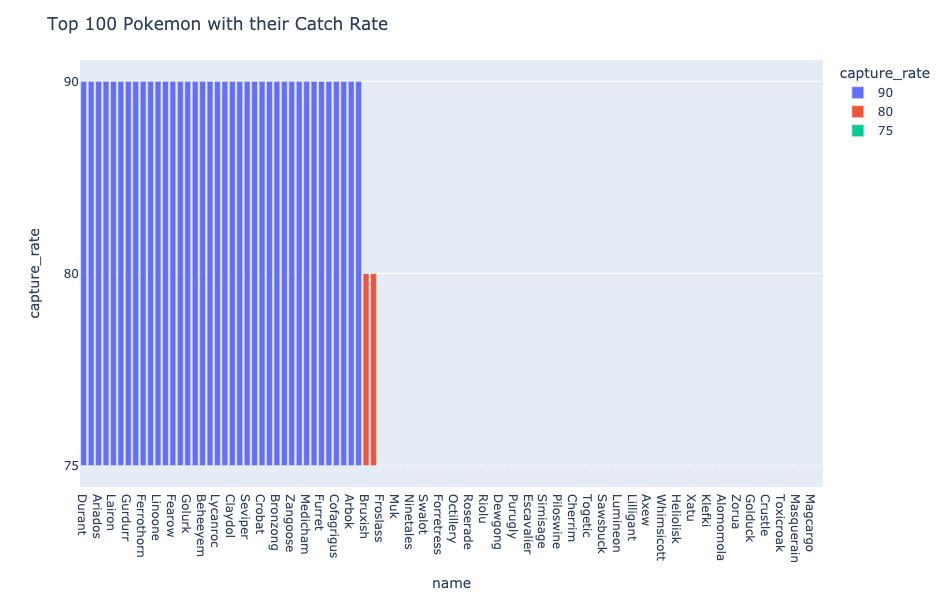

In [108]:
# WRONG
pokemon_catch_rate = pokemon.groupby('name')['capture_rate'].sum().reset_index().sort_values('capture_rate',ascending =False)
fig = px.bar(pokemon_catch_rate[:100], y='capture_rate', x='name', color='capture_rate', height=600)
fig.update_layout(
    title='Top 100 Pokemon with their Catch Rate')
fig.show()

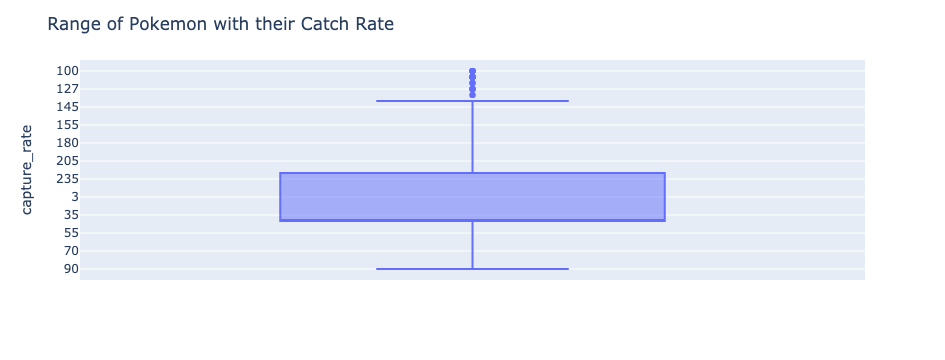

In [111]:
fig = px.box(pokemon_catch_rate, y="capture_rate")
fig.update_layout(
    title='Range of Pokemon with their Catch Rate')
fig.show()

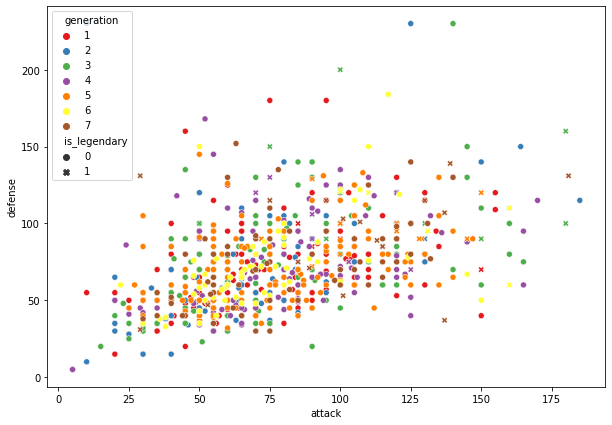

In [141]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = 'attack', y = 'defense', hue = 'generation', style ='is_legendary', data=pokemon, palette= "Set1");

# Size by HP

In [120]:
# Idea - facet grid by generation and annotate 

for index, row in water.nlargest(5, 'height_m').iterrows():
    plt.annotate(row['name'], # text to show
                 xy = (row['height_m'], row['weight_kg']), # the point to annotate 
                 xytext = (row['height_m']+0.2, row['weight_kg']), # where to show the text
                 fontsize=12)

<AxesSubplot:xlabel='generation', ylabel='base_total'>

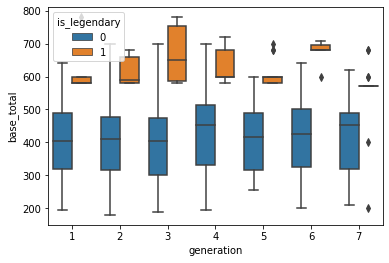

In [122]:
sns.boxplot(x='generation',y='base_total', hue='is_legendary',data = pokemon)

<AxesSubplot:>

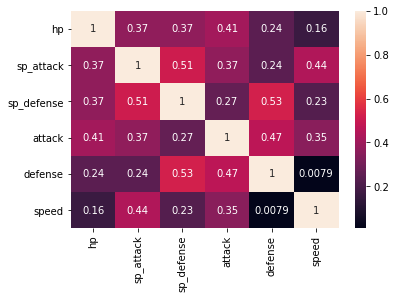

In [124]:
p = (pokemon.loc[:,['hp','sp_attack','sp_defense','attack','defense','speed']]).corr()
sns.heatmap(p,annot = True)


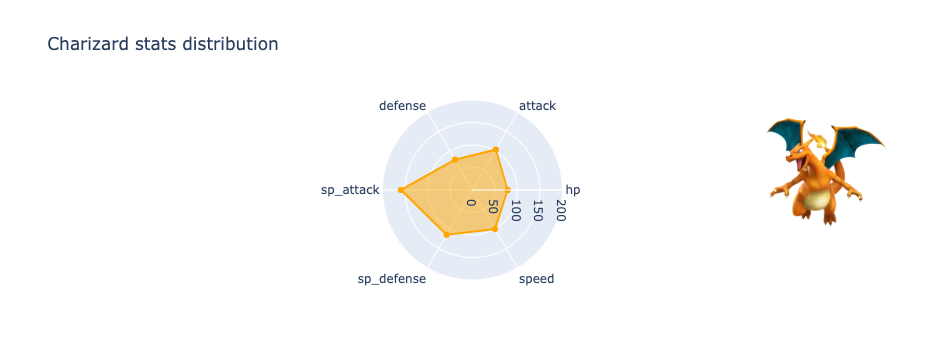

In [134]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

x = pokemon[pokemon["name"] == "Charizard"]
data = [go.Scatterpolar(
  r = [x['hp'].values[0],x['attack'].values[0],x['defense'].values[0],x['sp_attack'].values[0],x['sp_defense'].values[0],x['speed'].values[0],x["hp"].values[0]],
  theta = ['hp','attack','defense','sp_attack','sp_defense','speed', 'hp'],
  fill = 'toself',
     line =  dict(
            color = 'orange'
        )
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 200]
    )
  ),
  showlegend = False,
  title = "{} stats distribution".format(x.name.values[0])
)
fig = go.Figure(data=data, layout=layout)
fig.layout.images = [dict(
        source="https://rawgit.com/guramera/images/master/Charizard.png",
        xref="paper", yref="paper",
        x=0.95, y=0.3,
        sizex=0.6, sizey=0.6,
        xanchor="center", yanchor="bottom"
      )]

iplot(fig, filename = "Single Pokemon stats")

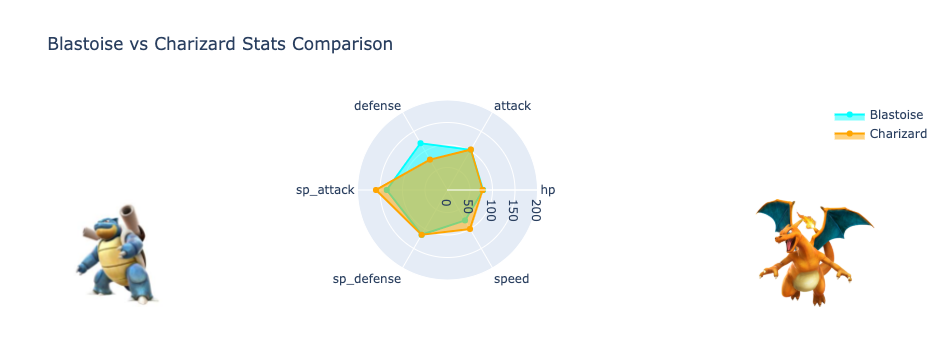

In [138]:
a = pokemon[pokemon["name"] == "Blastoise"]
b = pokemon[pokemon["name"] == "Charizard"]

data = [
    go.Scatterpolar(
        name = a.name.values[0],
        r = [a['hp'].values[0],a['attack'].values[0],a['defense'].values[0],a['sp_attack'].values[0],a['sp_defense'].values[0],a['speed'].values[0],a["hp"].values[0]],
        theta = ['hp','attack','defense','sp_attack','sp_defense','speed','hp'],
        fill = 'toself',
        line =  dict(
                color = 'cyan'
            )
        ),
    go.Scatterpolar(
            name = b.name.values[0],
            r = [b['hp'].values[0],b['attack'].values[0],b['defense'].values[0],b['sp_attack'].values[0],b['sp_defense'].values[0],b['speed'].values[0],b["hp"].values[0]],
            theta = ['hp','attack','defense','sp_attack','sp_defense','speed','hp'],
            fill = 'toself',
            line =  dict(
                color = 'orange'
            )
        )]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 200]
    )
  ),
  showlegend = True,
  title = "{} vs {} Stats Comparison".format(a.name.values[0], b.name.values[0])
)

fig = go.Figure(data=data, layout=layout)

fig.layout.images = [dict(
        source="https://rawgit.com/guramera/images/master/blastoise.jpg",
        xref="paper", yref="paper",
        x=0.05, y=-0.15,
        sizex=0.6, sizey=0.6,
        xanchor="center", yanchor="bottom"
      ),
        dict(
        source="https://rawgit.com/guramera/images/master/Charizard.png",
        xref="paper", yref="paper",
        x=1, y=-0.15,
        sizex=0.6, sizey=0.6,
        xanchor="center", yanchor="bottom"
      ) ]


iplot(fig, filename = "Pokemon stats comparison")

* TODO 
    - Types by generation
    - Stacked damage against type by type
    - Primary-type vs attribute heat map
    - Height vs Weight scatter
    - BMI feature
    - Attack, defense, speed by generation
    - Attack, defense, speed and hp by type
    - Steel types have the highest average defense.
    - For non-legendary Pokemon, there seems to exist a positive linear relationship between the attack and defense attributes. no such relationship exists for the legendary Pokemon.
    - There exists a weak positive relationship between the speed and the attack attributes but a stronger positive linear relationship between height, weight, and hp and the attack attribute.
    - Speed has a kind of a weak negative linear relationship to defense.
    - Ice type legendary Pokemon have a very high value of sp_defense but a low value of Speed. Ground legendary Pokemon have a very high attack attribute. Bug type legendary Pokemon have a very low of sp_defense. On the contrary, bug type and dark type Pokemon have similar speed attributes.
    - Steel type Pokemon have a high value of defense but very low Speed. Fighting type Pokemon have a high value of attack but a very low value of sp_attack. Ground, ice, and normal Pokemon have similar Hp levels and so do poison, psychic, and rock type Pokemon.
    - let’s formulate a hypothesis and see if it’s true. One would expect a defensive Pokemon to have a higher Hp (maybe so it can take a lot of hits?) and Pokemon that have a high value of attack to have a high value of sp_defense but a low value of defense.
    - For non-legendary Pokemon, there seems to be a correlation between sp_attack and sp_defense while no such relationship between attack and sp_attack or defense and speed and so on.

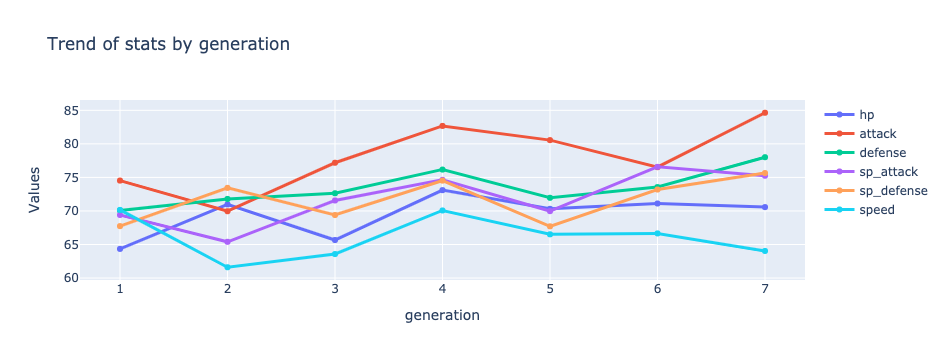

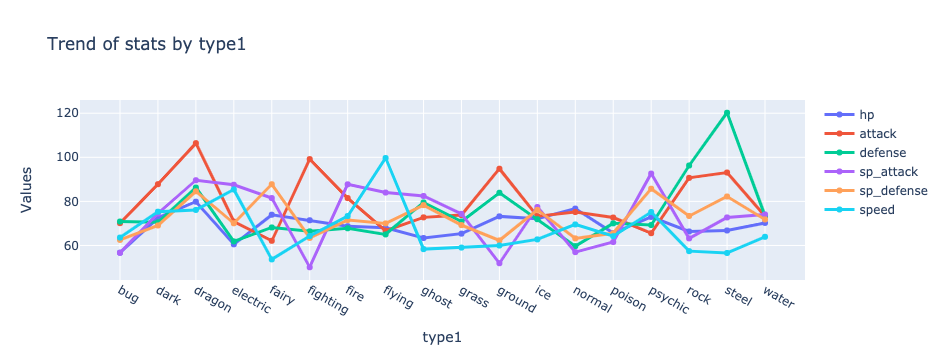

In [144]:
# Visualizing the trend of stats by type and generation.
def stats_by(classifier):
    data = []
    stats_names = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
    stats = pokemon.groupby(classifier)[stats_names].mean().reset_index()
    for stat in stats_names:
        stat_line = go.Scatter(
            x=stats[classifier],
            y=stats[stat],
            name=stat,
            line=dict(
                width=3,
            ),
        )

        data.append(stat_line)

    layout = go.Layout(
        title='Trend of stats by {}'.format(classifier),
        xaxis=dict(title=classifier),
        yaxis=dict(title='Values')
    )

    trend = go.Figure(data=data, layout=layout)
    iplot(trend, filename='trend')


stats_by('generation')
stats_by('type1')